<a href="https://colab.research.google.com/github/Carmodann1311/mineria-de-datos/blob/main/Tarea_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.43      0.60      0.50         5

    accuracy                           0.62        16
   macro avg       0.60      0.62      0.60        16
weighted avg       0.67      0.62      0.64        16

Reglas del árbol de decisión:
 |--- calc <= 5.65
|   |--- calc <= 2.32
|   |   |--- ph <= 5.01
|   |   |   |--- class: 1
|   |   |--- ph >  5.01
|   |   |   |--- ph <= 6.91
|   |   |   |   |--- class: 0
|   |   |   |--- ph >  6.91
|   |   |   |   |--- urea <= 99.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- urea >  99.50
|   |   |   |   |   |--- class: 1
|   |--- calc >  2.32
|   |   |--- osmo <= 536.00
|   |   |   |--- calc <= 2.43
|   |   |   |   |--- class: 0
|   |   |   |--- calc >  2.43
|   |   |   |   |--- class: 1
|   |   |--- osmo >  536.00
|   |   |   |--- gravity <= 1.02
|   |   |   |   |--- calc <= 2.49

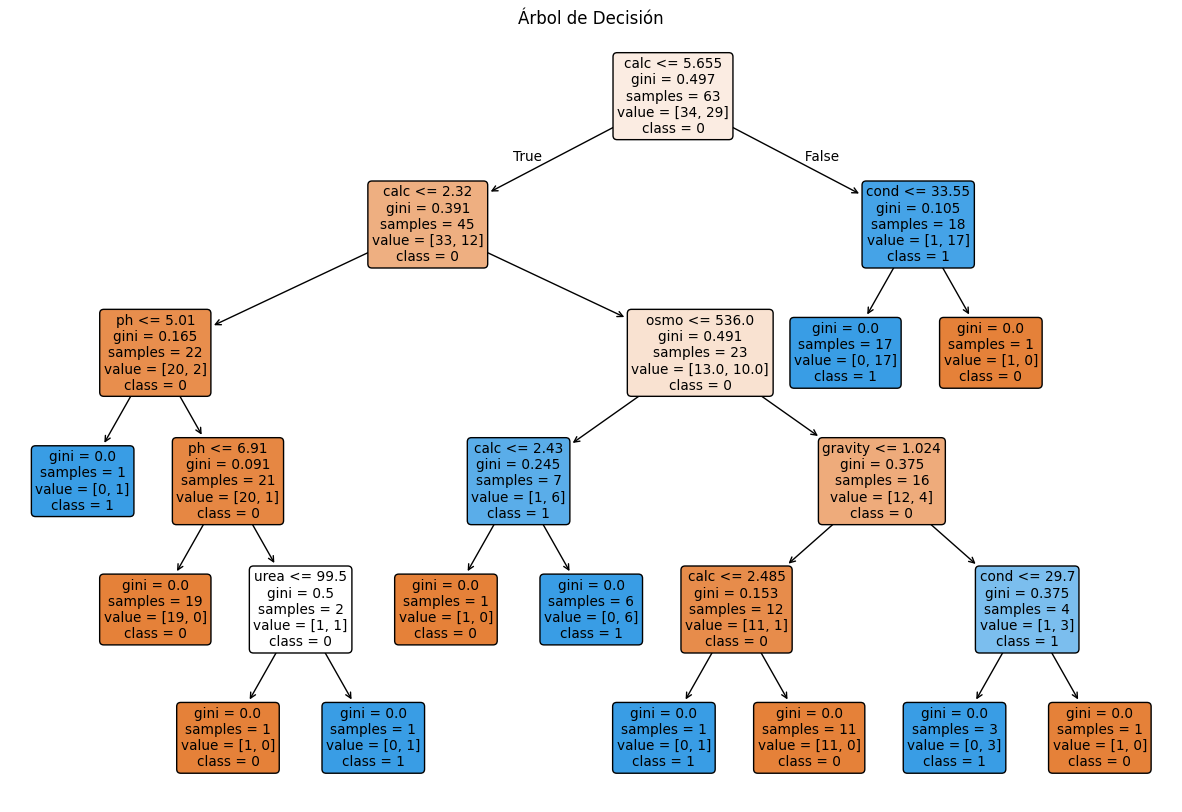

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Cargar datos
data = pd.read_csv("/content/kindey stone urine analysis.csv")

# Separar variables independientes (X) y dependiente (y)
X = data[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']]
y = data['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Mostrar las reglas del árbol
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Reglas del árbol de decisión:\n", tree_rules)

# Visualización del árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=["0", "1"], filled=True, rounded=True)
plt.title("Árbol de Decisión")
plt.savefig("decision_tree.png")
plt.show()
